In [11]:
# import libraries
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap


In [12]:
# define probability of getting head in coin_toss and the distribution

p_head = 0.5

num_iter = 1000
distribution = [1/num_iter]*num_iter
x = np.linspace(0.001, 1, 1000)

In [13]:
# define a change in distribution for a coin_toss
head = 0
tail = 0
def coin_toss(head, tail, distribution):
    r = random.random()
    if r > p_head:
        for i in range(len(distribution)): 
            distribution[i] = distribution[i]*(1-x[i])
        tail += 1
    else:
        for i in range(len(distribution)):
            distribution[i] = distribution[i]*x[i]
        head += 1
    return head, tail, distribution

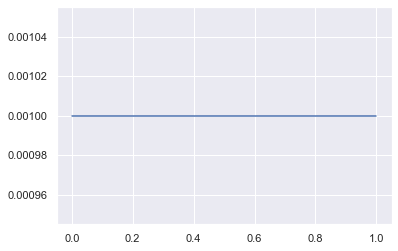

In [14]:
#plot the original distribution
plt.plot(x, distribution)
plt.show()

In [15]:
# toss 1 coin and plot

# head, tail, distribution = coin_toss(head, tail, distribution)
# print('Head: ', head)
# print('Tail: ', tail)
# plt.plot(x, distribution)
# plt.show()

In [16]:
# toss it n times and find the distribution

# num_toss = 1000

# for m in range(num_toss):
#     head, tail, distribution = coin_toss(head, tail, distribution)
#     k = 1/sum(distribution)
#     for i in range(len(distribution)):
#         distribution[i] = k * distribution[i]

# print('Head: ', head)
# print('Tail: ', tail)
# fig = plt.figure(figsize = (15, 7))
# sns.set()
# sns.lineplot(x, distribution)
# plt.xlabel("P(Head)")
# plt.show()

In [17]:
# plotting as a scatter plot

# num_toss = 500

# # set animation
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps= 20, metadata=dict(artist='Me'), bitrate=1800)

# # get a figure
# fig, ax = plt.subplots(figsize = (20,10))
# ax.set_xlabel('P(head)', size = 12)
# ax.set_ylim(0, 0.020)

# # set color for changing coloring of older plots
# colors = [[0,0,1,0],[0,0,1,0.5],[0,0.2,0.4,1]]
# cmap = LinearSegmentedColormap.from_list("", colors)
# scatter = ax.scatter([], [], s = 3, c=[], cmap=cmap, vmin=0,vmax=1)

# # define a list to save all the distributions
# distributions = []
# intensity = []
# plot_data = []
# x_vals = []
# head_vals = []
# tail_vals = []

# # get a list of distributions, using coin_toss simulation
# for m in range(num_toss):
#     head, tail, distribution = coin_toss(head, tail, distribution)
#     head_vals.append(head)
#     tail_vals.append(tail)
#     k = 1/sum(distribution)
#     for i in range(len(distribution)):
#         distribution[i] = k * distribution[i]
#     distributions.append(distribution.copy())

# # define animation
# def animate(i):
#     global plot_data, x, intensity, x_vals
#     ax.set_title('Head: ' + str(head_vals[i]) + ', Tail: ' + str(tail_vals[i]))
#     data = distributions[i]
#     plot_data += data
#     x_vals = np.concatenate((x_vals, x))
#     intensity = np.concatenate((np.array(intensity)*0.80, np.ones(len(data))))
#     ax.set_ylim(0, max(0.01, max(plot_data)))
#     if len(x_vals) > 10*len(data):
#         plot_data = plot_data[len(data):]
#         x_vals = x_vals[len(data):]
#         intensity = intensity[len(data):]
#     scatter.set_offsets(np.c_[x_vals, plot_data])
#     scatter.set_array(intensity)

# # actual plotting
# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=num_toss, repeat=True)
# ani.save('test.mp4', writer=writer)

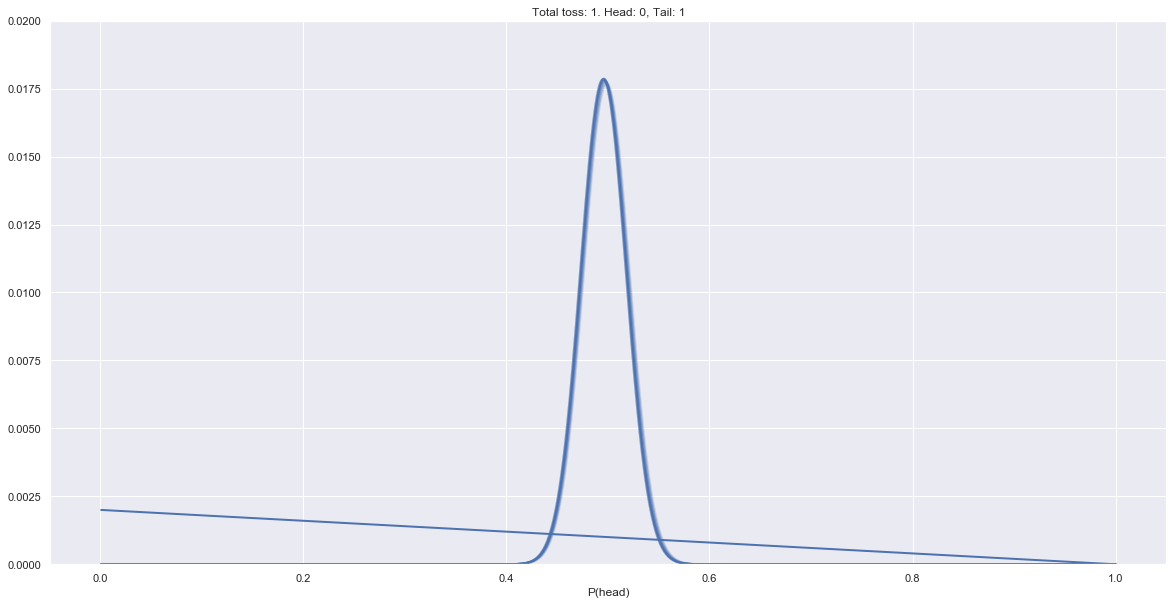

In [18]:
# finally :)

num_toss = 500

# set animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps= 20, metadata=dict(artist='Me'), bitrate=1800)

# get a figure
sns.set()
fig, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('P(head)', size = 12)
ax.set_ylim(0, 0.020)

# initial plotting
alpha = 1
lines = []
for i in range(15):
    line, = ax.plot(x, distribution, c = 'b', alpha = alpha, linewidth = 2)
    lines.append(line)
    alpha *= 0.8

# define a list to save all the distributions
distributions = []
plot_data = []
head_vals = []
tail_vals = []

# get a list of distributions, using coin_toss simulation
for m in range(num_toss):
    head, tail, distribution = coin_toss(head, tail, distribution)
    head_vals.append(head)
    tail_vals.append(tail)
    k = 1/sum(distribution)
    for i in range(len(distribution)):
        distribution[i] = k * distribution[i]
    distributions.append(distribution.copy())  
    
# define animation
def animate(i):
    ax.set_title('Total toss: '+str(head_vals[i]+ tail_vals[i]) + '. Head: ' 
                 + str(head_vals[i]) + ', Tail: ' + str(tail_vals[i]))
    for j in range(len(lines)):
        lines[j].set_ydata(distributions[i-j])
    return lines
    
# actual plotting
ani = matplotlib.animation.FuncAnimation(fig, animate,
                                         frames=num_toss, repeat=True)
ani.save('test.mp4', writer=writer)